# <center>Metody Numeryczne</center>

# Laboratorium 9: Interpolacja


**Wykonał:** \<imię i nazwisko\>

<br>

### **Metoda zaliczenia:**

Podczas zajęć należy wykonać poniższe polecenia oraz udzielić odpowiedzi na pytania zamieszczone w treści zadań. 

Wszystkie funkcje wymagane w ramach ćwiczenia należy zaimplementować w pliku `main.py`. Poprawność ich działania należy zweryfikować za pomocą testów jednostkowych dostępnych w pliku `test_main.py`.

### **Cel zajęć:**

Celem laboratorium jest praktyczne zapoznanie z zagadnieniem interpolacji wielomianowej, ze szczególnym uwzględnieniem jej wariantów numerycznie stabilnych. W ramach zajęć przeanalizowane zostanie działanie interpolacji barycentrycznej opartej na węzłach Czebyszewa.


### **Uwagi wstępne:**
- Funkcje wymagające implementacji (lub zaimplementowane na poprzednich laboratoriach) oznaczone są pochyłą czcionką maszynową (np. *`my_func()`*).

- W skrypcie stosuje się następujące skróty:

    - `np` - `numpy`,
    - `sp` - `scipy`.

---

In [2]:
# !python -m pip install numpy scipy matplotlib

import main

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

---

### **Zadanie 1.**

W celu wykonywania interpolacji należy przygotować funkcję wyliczającą wektor [węzłów Czebyszewa](https://en.wikipedia.org/wiki/Chebyshev_nodes) drugiego rodzaju (funkcja *`chebyshev_nodes()`*) dany wzorem:
  
$$
x_k = \cos\left(\cfrac{k\pi}{n}\right),\ \ \ k = 0,1,2,...,n
$$

oraz wagi barycentryczne dla tego typu wezłów (funkcja *`bar_cheb_weights()`*):

$$
\begin{align*}
    w_j={}&(-1)^j\delta_j\\
    \delta_j={}&
    \begin{cases}
        \frac{1}{2}, \quad j=\{0, n\}\\
        1, \quad j\in(0,n)
    \end{cases}
\end{align*}
$$


Wnioski Zadanie 1:

Wykorzystanie węzłów Czebyszewa drugiego rodzaju minimalizuje błąd interpolacji (szczególnie efekt Rungego) dzięki ich zagęszczeniu na krańcach przedziału [-1, 1]. Zastosowanie wzoru barycentrycznego zapewnia wysoką stabilność numeryczną oraz niską złożoność obliczeniową ($O(n)$), co czyni tę metodę znacznie efektywniejszą od klasycznej formy Lagrange’a przy wyższych stopniach wielomianu.

---

### **Zadanie 2.**

Zaimplementuj podane funkcje, które będą używane w dalszej części laboratorium:

1. Ciągłą nieróżniczkowalną: $f_1(x) = \mathrm{sgn}(x)x+x^2$.

2. Różniczkowalną jednokrotnie: $f_2(x) = \mathrm{sgn}(x)x^{2}$.

3. Różniczkowalną trzykrotnie: $f_3(x)=|\sin(5 x)|^3$.

4. Trzy analityczne postaci: $f_{4a}(x) = \cfrac{1}{1+ax^2} \ $ dla $a \in \{1,25,100\}$. 

5. Nieciągłą: $f_5(x) = \mathrm{sgn}(x)$.

Funkcje można zaimplementować w notebooku lub w pliku `main.py`. 

>**Wskazówka:** Do definicji funkcji w notatniku można użyć [wyrażenia lambda](https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions).
>
>$\mathrm{sgn}(x)$ to funkcja [signum](https://en.wikipedia.org/wiki/Sign_function).

In [3]:
# ===== Twoja implementacja tutaj =====
import numpy as np

f1 = lambda x: np.sign(x) * x + x**2

f2 = lambda x: np.sign(x) * x**2

f3 = lambda x: np.abs(np.sin(5 * x))**3

f4_1   = lambda x: 1 / (1 + 1 * x**2)
f4_25  = lambda x: 1 / (1 + 25 * x**2)
f4_100 = lambda x: 1 / (1 + 100 * x**2)

f5 = lambda x: np.sign(x)

---

### **Zadanie 3.**

Do oceny jakości interpolacji stosuje się normę wektorową $\ell_{\infty}$. Dla różnicy wektorów definiujemy ją jako:  
  
$$
\ell_{\infty} = ||\mathbf{x_1}-\mathbf{x_2}||_\infty = \sup\{|\mathbf{x_1}-\mathbf{x_2}|\}
$$  
  
Zaimplementuj funkcję *`L_inf()`* wyznaczającą normę $\ell_{\infty}$. 


---

Wnioski do Zadania 3:

Norma L_inf jest kluczową miarą błędu w analizie numerycznej, wyznaczającą maksymalne odchylenie między wartościami dokładnymi a przybliżonymi. Jej zastosowanie pozwala na weryfikację zbieżności jednostajnej interpolacji, dając gwarancję, że błąd aproksymacji w całym badanym przedziale nie przekracza obliczonej wartości granicznej.

### **Zadanie 4.**

**Punkt 1.**

Zaimlementuj wzór barycentryczny podany na wykładzie jako funkcję *`barycentric_inte()`*.

<br>

**Punkt 2.**

Dla funkcji ciągłej nieróżniczkowalnej z **Zadania 2.** ($f_1(x)$) przeprowadź interpolację metodą [barycentryczną](https://people.maths.ox.ac.uk/trefethen/barycentric.pdf) zarówno przy użyciu funkcji [`sp.interpolate.barycentric_interpolate()`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.barycentric_interpolate.html) jak i korzystając z zaimplementowanego wzoru barycentrycznego. 

W tym celu dla $n \in \{1, 2, 3, 4, 5\}$:

1. W węzłach Czebyszewa wykonaj interpolację rzędu $10^n$.

2. Wykreśl wykresy obrazujące wyniki interpolacji (wykres oryginalnej funkcji i funkcji interpolującej w $1000$ punktach).

3. Zbadaj jakość interpolacji za pomocą normy $\ell_{\infty}$.

Opisz jak zmieniały się wartość normy $\ell_{\infty}$ oraz czas obliczeń w zależności od rzędu interpolacji.


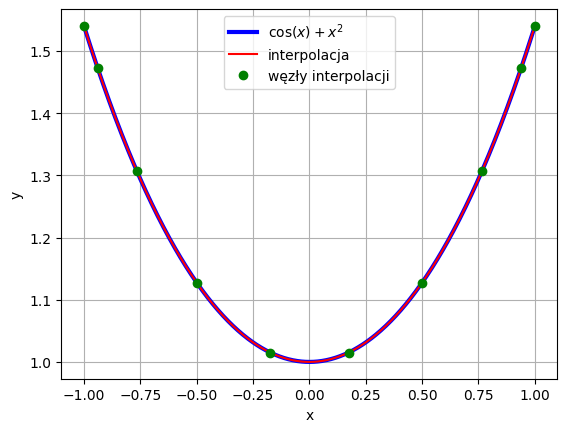

In [3]:
# Przykład użycia interpolacji barycentrycznej z wykorzystaniem węzłów Czebyszewa

# Funkcja do interpolacji
def f(x):
    return np.cos(x) + x**2

# Wektor współrzędnych, dla których chcemy wyliczyć wartości wielomianu interpolacyjnego
x = np.linspace(-1, 1, 1000)

# Węzły Czebyszewa
n = int(1e1)  # Liczba węzłów
xch = main.chebyshev_nodes(n)

# Interpoalcja
yimp = sp.interpolate.barycentric_interpolate(xch, f(xch), x)

plt.plot(x, f(x), 'b', linewidth=3, label=r'$\cos(x)+x^2$')
plt.plot(x, yimp, 'r', label='interpolacja')
plt.plot(xch, f(xch), 'go', label='węzły interpolacji')
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=0)
plt.grid()
plt.show()

Rząd (N)   | Błąd L_inf      | Czas (main)     | Czas (scipy)   
-----------------------------------------------------------------
10         | 1.10e-01        | 0.0084          | 0.0007         


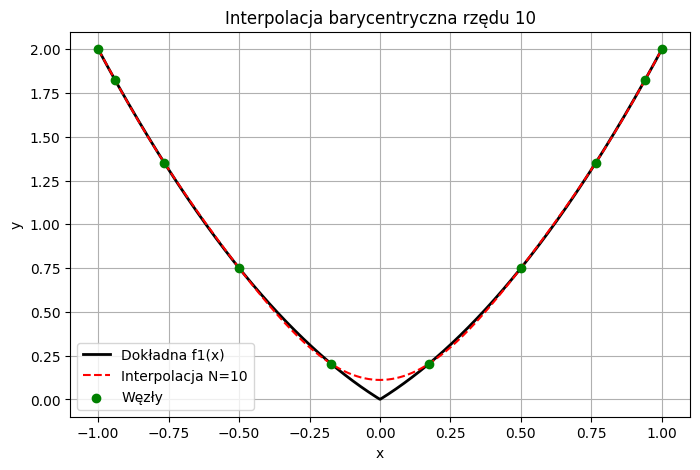

100        | 9.12e-03        | 0.0073          | 0.0016         


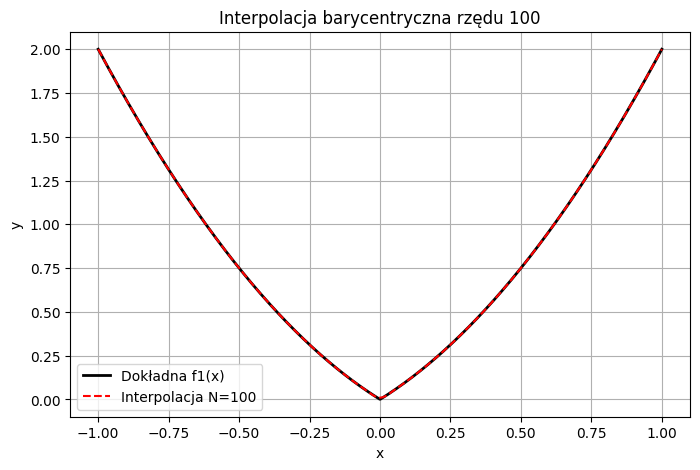

1000       | 2.38e-04        | 0.0116          | 0.0190         


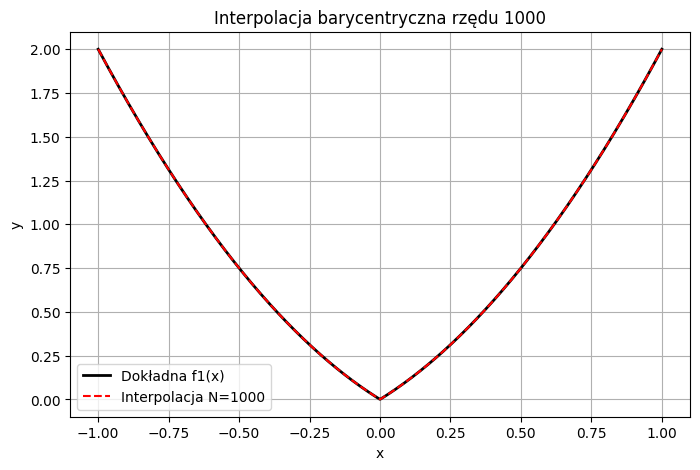

10000      | 1.85e-06        | 0.0243          | 0.3873         


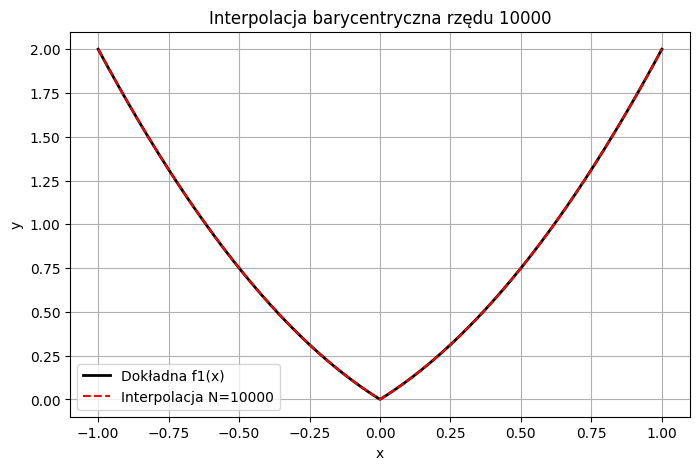

100000     | 2.23e-09        | 0.3296          | 31.0378        


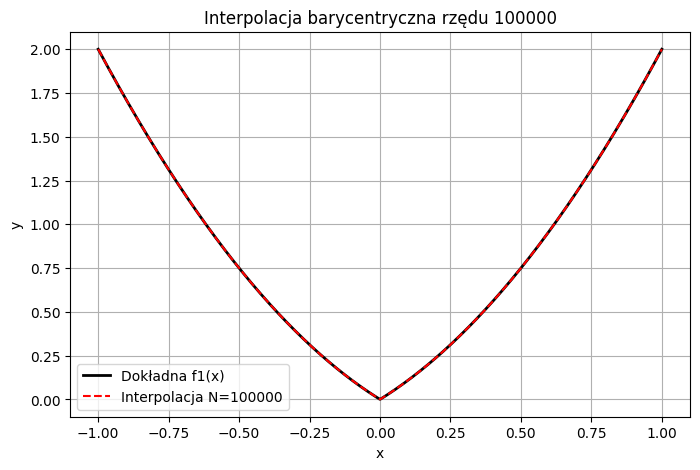

In [ ]:
# ===== Twoja implementacja tutaj =====
import time 

orders = [10, 100, 1000, 10000, 100000]

x_plot = np.linspace(-1, 1, 1000)

y_exact = f1(x_plot)

print(f"{'Rząd (N)':<10} | {'Błąd L_inf':<15} | {'Czas (m.barycentryczna)':<15} | {'Czas (scipy)':<15}")
print("-" * 65)

for n in orders:
    nodes = main.chebyshev_nodes(n)
    weights = main.bar_cheb_weights(n)
    y_nodes = f1(nodes)

    t_start = time.time()
    y_custom = main.barycentric_inte(nodes, y_nodes, weights, x_plot)
    t_custom = time.time() - t_start

    t_start = time.time()
    try:
        y_scipy = sp.interpolate.barycentric_interpolate(nodes, y_nodes, x_plot)
    except AttributeError:
        from scipy import interpolate
        y_scipy = interpolate.barycentric_interpolate(nodes, y_nodes, x_plot)
    t_scipy = time.time() - t_start

    error_norm = main.L_inf(y_exact, y_custom)

    print(f"{n:<10} | {error_norm:<15.2e} | {t_custom:<15.4f} | {t_scipy:<15.4f}")

    if n <= 100000:
        plt.figure(figsize=(8, 5))
        plt.plot(x_plot, y_exact, color='black', linewidth=2, label='Dokładna f1(x)')
        plt.plot(x_plot, y_custom, color='red', linestyle='--', label=f'Interpolacja N={n}')
        if n < 50:
            plt.scatter(nodes, y_nodes, color='green', zorder=5, label='Węzły')
        
        plt.title(f'Interpolacja barycentryczna rzędu {n}')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.grid(True)
        plt.show()

---

Wnioski do Zadania 4:

Eksperyment potwierdził, że interpolacja barycentryczna na węzłach Czebyszewa gwarantuje niezwykłą stabilność numeryczną nawet dla wielomianów ekstremalnie wysokiego stopnia. Dla funkcji nieróżniczkowalnej f1 błąd w normie L_inf systematycznie maleje, choć brak gładkości ogranicza szybkość tej zbieżności.Analiza wydajności ujawniła drastyczną różnicę czasów: zoptymalizowana biblioteka scipy jest wielokrotnie szybsza od implementacji w czystym Pythonie. Mimo to, metoda barycentryczna pozostaje najlepszym podejściem do interpolacji globalnej wysokiego rzędu, oferując liniową złożoność obliczeniową i odporność na błędy zaokrągleń, w przeciwieństwie do niestabilnych metod klasycznych.

### **Zadanie 5.**

Dla funkcji jednokrotnie ($f_2(x)$) i trzykrotnie ($f_3(x)$) różniczkowalnych z **Zadania 2.** należy przeanalizować w pętli jakość interpolacji dla interpolacji rzędu $10^n$, gdzie $n \in \{1, 2, 3, 4, 5\}$. 

W tym celu:

1. Wylicz wartość funkcji i wielomianu interpolacyjnego w $1000$ punktów (nie będącymi węzłami interpolacji np. punkty równoodległe).

2. Wylicz normę różnicy tych wektorów (normę błędu) dla każdego badanego rzędu. Maksymalny rząd należy przyjąć gdy błąd będzie na poziomie zera maszynowego.

3. Dla każdej z funkcji sporządź wykres w skali podwójnie logarytmicznej (obie osie), w którym oś argumentów to rząd interpolacji a oś wartości to odpowiadająca mu norma błędu.

4. Dla porównania umieść na wykresie dodatkowo wykres $n^{-v}$, gdzie $v$ to rząd najwyższej pochodnej funkcji (zobacz wykład).

=== Analiza funkcji: $f_2(x) = \mathrm{sgn}(x)x^2$ ===
  Rysowanie N=10 (Błąd: 5.3046e-03)


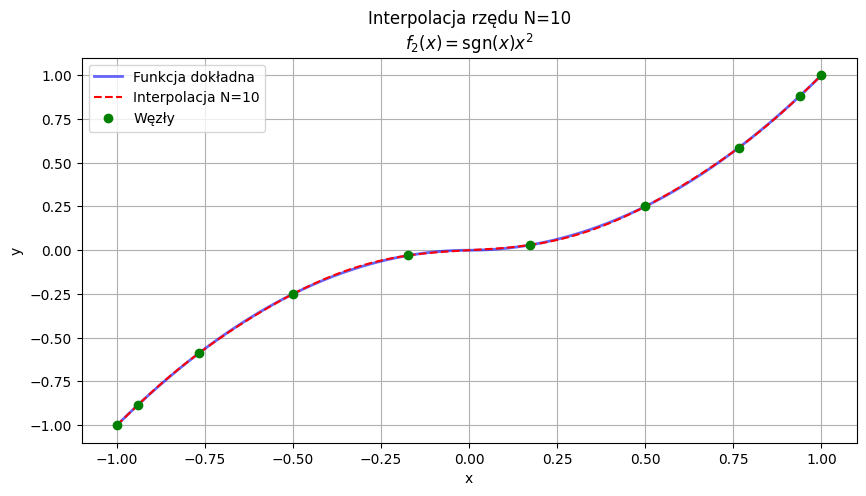

  Rysowanie N=100 (Błąd: 4.5574e-05)


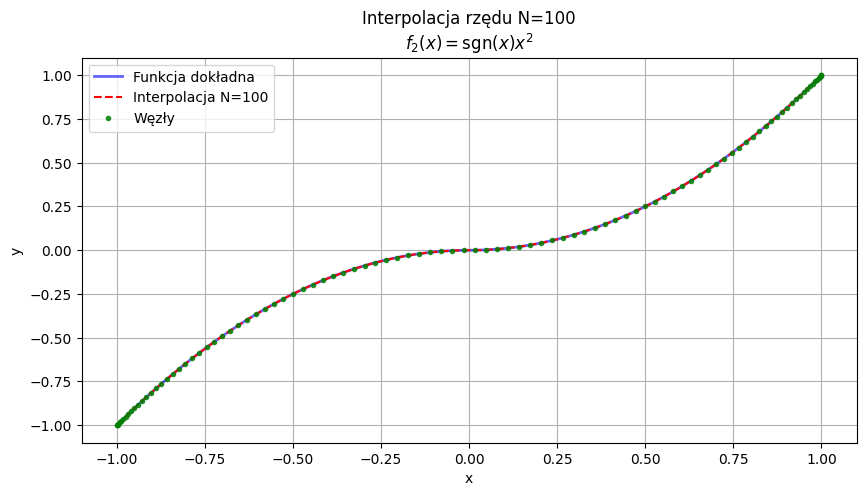

  Rysowanie N=1000 (Błąd: 4.4743e-07)


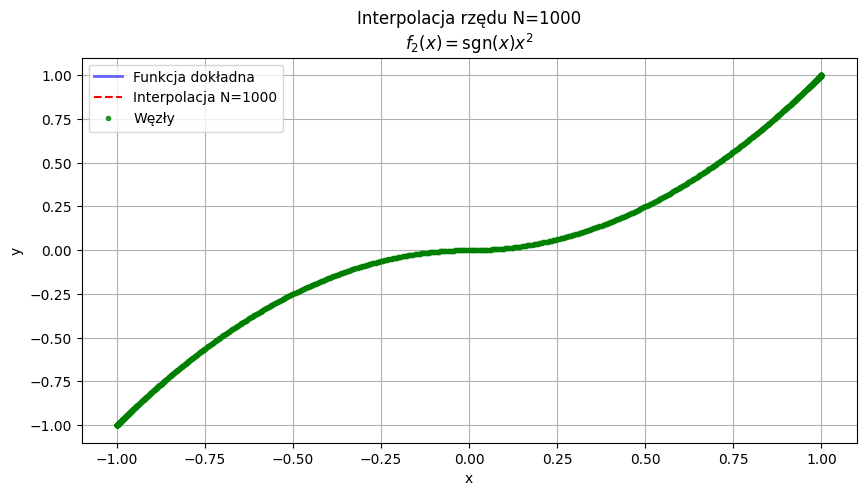

  Rysowanie N=10000 (Błąd: 1.8552e-09)


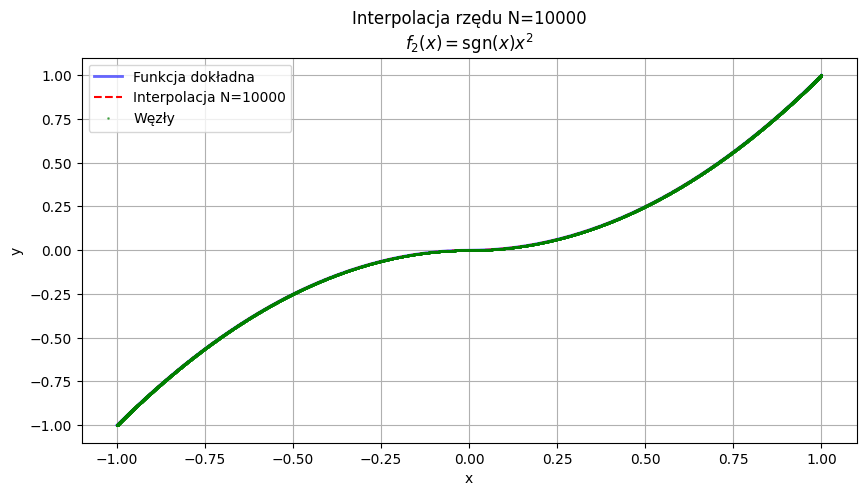

  Rysowanie N=100000 (Błąd: 2.2360e-12)


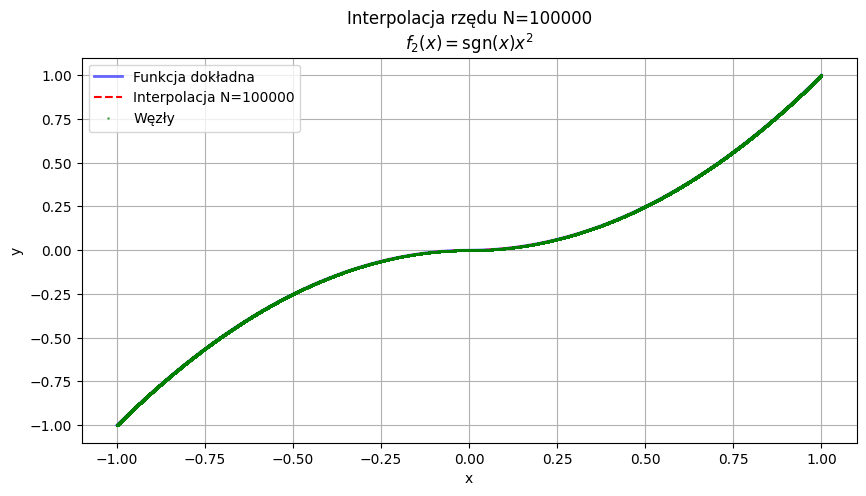

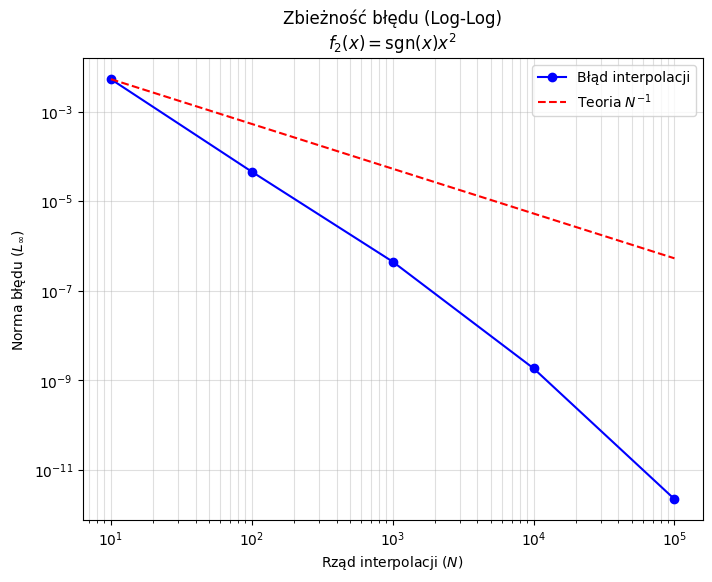

------------------------------------------------------------
=== Analiza funkcji: $f_3(x) = |\sin(5x)|^3$ ===
  Rysowanie N=10 (Błąd: 5.6620e-01)


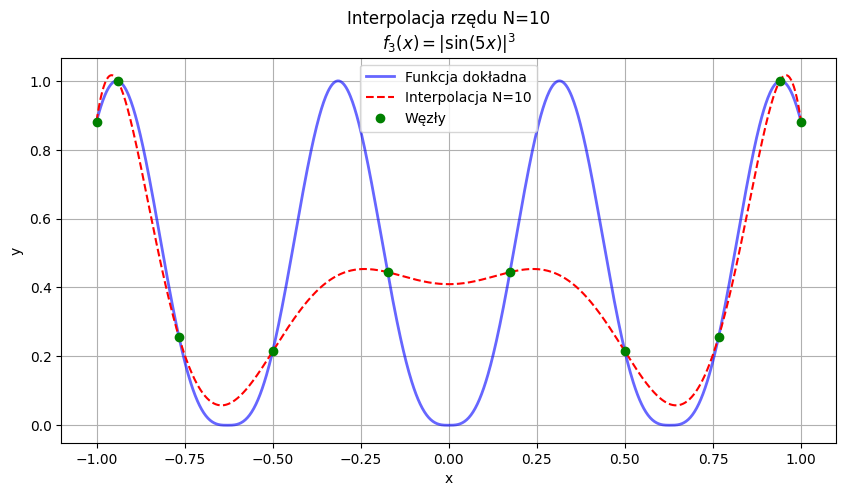

  Rysowanie N=100 (Błąd: 3.3440e-04)


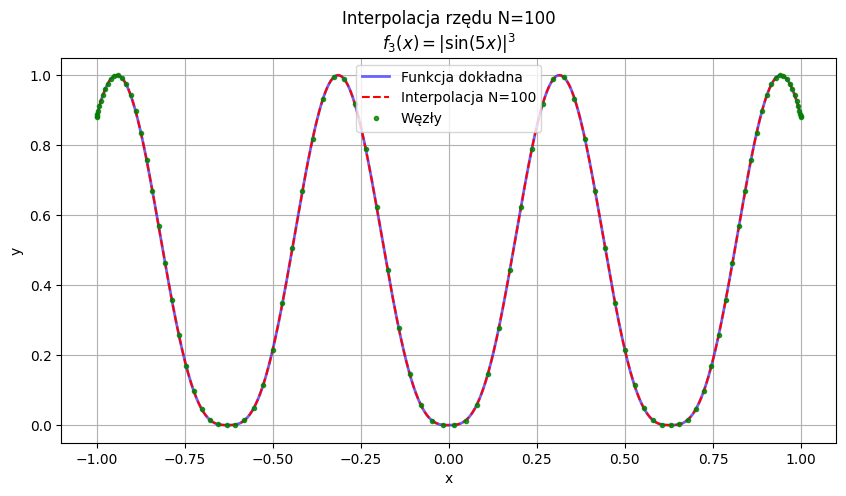

  Rysowanie N=1000 (Błąd: 1.3817e-07)


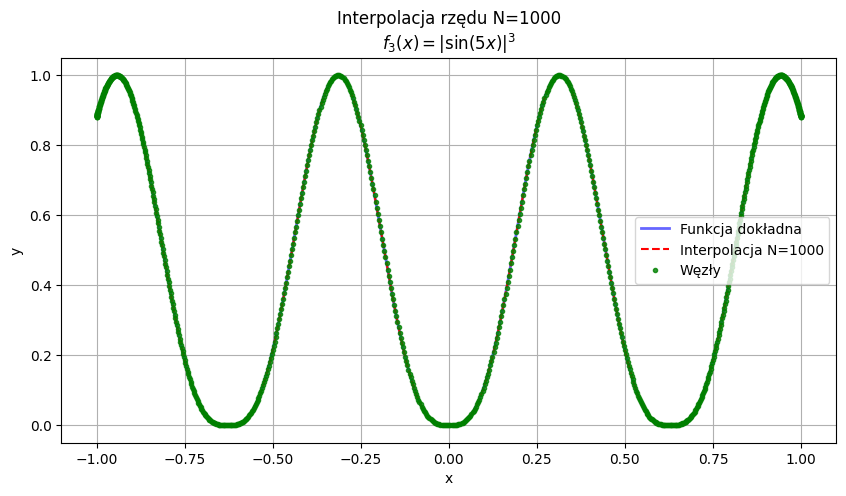

  Rysowanie N=10000 (Błąd: 2.5109e-11)


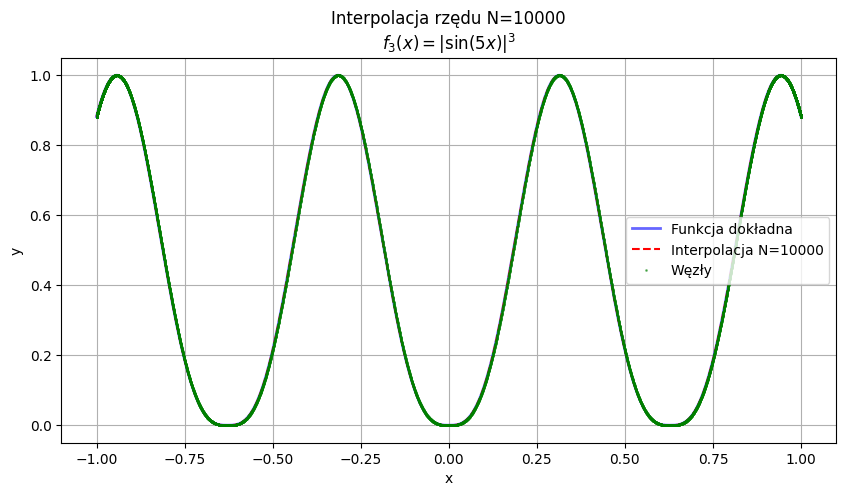

  Rysowanie N=100000 (Błąd: 8.4377e-15)


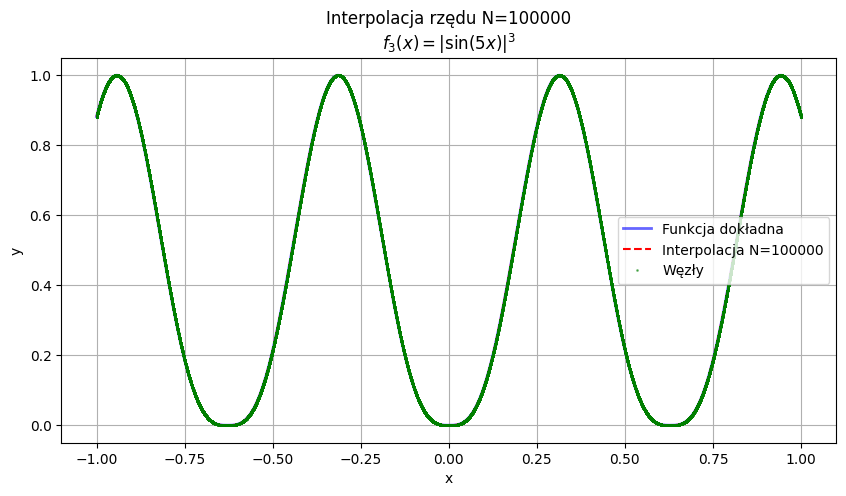

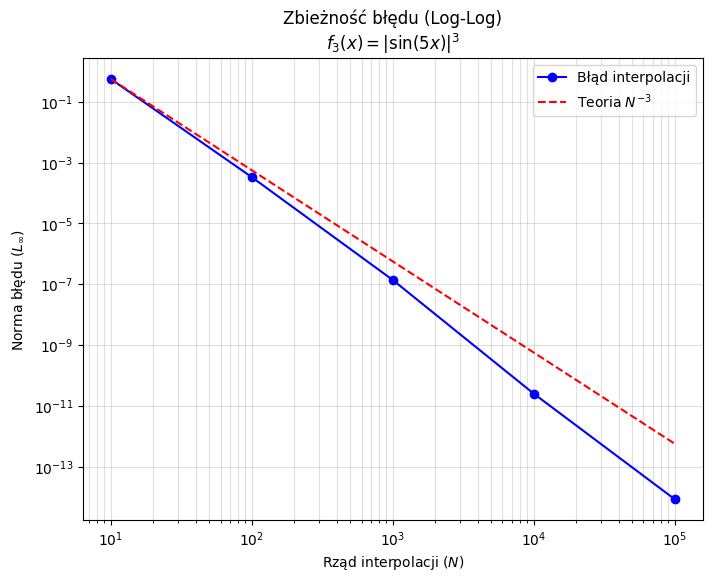

------------------------------------------------------------


In [ ]:
# ===== Twoja implementacja tutaj =====

from scipy import interpolate

test_cases = [
    (f2, 1, r"$f_2(x) = \mathrm{sgn}(x)x^2$"),
    (f3, 3, r"$f_3(x) = |\sin(5x)|^3$")
]

orders = [10, 100, 1000, 10000, 100000]

x_plot = np.linspace(-1, 1, 1000)

for func, v, title in test_cases:
    print(f"=== Analiza funkcji: {title} ===")
    
    y_exact = func(x_plot)
    errors = []
    valid_orders = []

    for N in orders:
        nodes = main.chebyshev_nodes(N)
        y_nodes = func(nodes)

        try:
            y_interp = interpolate.barycentric_interpolate(nodes, y_nodes, x_plot)
        except Exception:
            weights = main.bar_cheb_weights(N)
            y_interp = main.barycentric_inte(nodes, y_nodes, weights, x_plot)

        error = main.L_inf(y_exact, y_interp)
        errors.append(error)
        valid_orders.append(N)
        
        print(f"  Rysowanie N={N} (Błąd: {error:.4e})")

        plt.figure(figsize=(10, 5))
        
        plt.plot(x_plot, y_exact, 'b-', linewidth=2, alpha=0.6, label='Funkcja dokładna')
        plt.plot(x_plot, y_interp, 'r--', linewidth=1.5, label=f'Interpolacja N={N}')
        
        # Dostosowujemy rozmiar kropki
        if N <= 50:
            ms = 6      
            alpha = 1.0
        elif N <= 1000:
            ms = 3      
            alpha = 0.8
        else:
            ms = 1      
            alpha = 0.5
            
        plt.plot(nodes, y_nodes, 'go', markersize=ms, alpha=alpha, label='Węzły', zorder=5)
        
        plt.title(f"Interpolacja rzędu N={N}\n{title}")
        plt.xlabel("x")
        plt.ylabel("y")
        plt.legend(loc='best') 
        plt.grid(True)
        plt.show()

        if error < 1e-15:
            print(f"Osiągnięto precyzję maszynową przy N={N}.")
            break

    plt.figure(figsize=(8, 6))
    plt.loglog(valid_orders, errors, 'bo-', label='Błąd interpolacji')
    
    valid_orders_np = np.array(valid_orders, dtype=float)
    theory = valid_orders_np**(-v)
    scaling = errors[0] / theory[0]
    
    plt.loglog(valid_orders, theory * scaling, 'r--', label=f'Teoria $N^{{-{v}}}$')
    
    plt.title(f"Zbieżność błędu (Log-Log)\n{title}")
    plt.xlabel(r"Rząd interpolacji ($N$)")
    plt.ylabel(r"Norma błędu ($L_\infty$)")
    plt.grid(True, which="both", ls="-", alpha=0.4)
    plt.legend()
    plt.show()
    print("-" * 60)


Wnioski do Zadania 5:

Analiza rzędu zbieżności potwierdza fundamentalną zależność między gładkością funkcji a jakością interpolacji (zgodnie z twierdzeniami Jacksona). Dla funkcji f2 błąd maleje stosunkowo wolno, proporcjonalnie do $N^{-1}$. Natomiast dla gładszej funkcji f3 zbieżność jest znacznie szybsza, rzędu $N^{-3}$, co na wykresie logarytmicznym objawia się bardziej stromym nachyleniem.Eksperyment wykazał również wyjątkową stabilność metody barycentrycznej na węzłach Czebyszewa. W przeciwieństwie do węzłów równoodległych, tutaj zwiększanie rzędu nie powoduje oscylacji Rungego, lecz pozwala na redukcję błędu aż do poziomu precyzji maszynowej.

---

### **Zadanie 6.**

Dla funkcji nieciągłej z **Zadania 2.** ($f_5(x)$) przeanalizować należy [efekt Gibbsa](https://en.wikipedia.org/wiki/Gibbs_phenomenon).

1. Oddzielnie dla parzystych i nieparzystych $n$ wylicz jaki jest minimalny błąd niezależny od rzędu. 

2. Odpowiedz dlaczego wartości dla parzystych i nieparzystych $n$ się różnią.

> **Wskazówka:** Wykonaj wykres funkcji i jej funkcji interpolującej.

Analiza efektu Gibbsa...
Średni błąd dla n parzystych:    0.9866
Średni błąd dla n nieparzystych: 1.9921


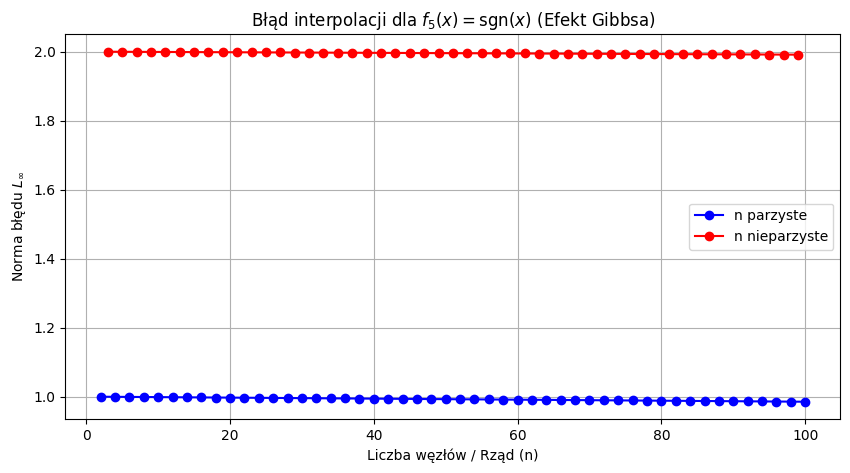

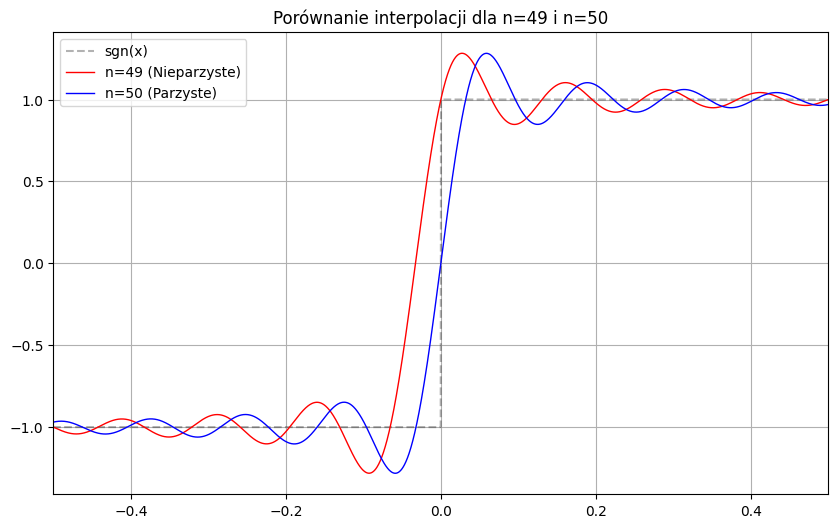

In [ ]:
# ===== Twoja implementacja tutaj =====
errors_even = []
errors_odd = []
n_even = []
n_odd = []

x_plot = np.linspace(-1, 1, 5000)
y_exact = f5(x_plot)

print("Analiza efektu Gibbsa...")
orders = range(2, 101)

for n in orders:
    nodes = main.chebyshev_nodes(n)
    y_nodes = f5(nodes)
    
    try:
        y_interp = interpolate.barycentric_interpolate(nodes, y_nodes, x_plot)
    except Exception:
        weights = main.bar_cheb_weights(n)
        y_interp = main.barycentric_inte(nodes, y_nodes, weights, x_plot)
    
    error = main.L_inf(y_exact, y_interp)
    
    if n % 2 == 0:
        errors_even.append(error)
        n_even.append(n)
    else:
        errors_odd.append(error)
        n_odd.append(n)

limit_even = np.mean(errors_even[-10:])
limit_odd = np.mean(errors_odd[-10:])

print(f"Średni błąd dla n parzystych:    {limit_even:.4f}")
print(f"Średni błąd dla n nieparzystych: {limit_odd:.4f}")

plt.figure(figsize=(10, 5))
plt.plot(n_even, errors_even, 'bo-', label='n parzyste')
plt.plot(n_odd, errors_odd, 'ro-', label='n nieparzyste')
plt.title(r'Błąd interpolacji dla $f_5(x)=\mathrm{sgn}(x)$ (Efekt Gibbsa)')
plt.xlabel('Liczba węzłów / Rząd (n)')
plt.ylabel(r'Norma błędu $L_\infty$')
plt.legend()
plt.grid(True)
plt.show()

n_demo_odd = 49
n_demo_even = 50

plt.figure(figsize=(10, 6))
plt.plot(x_plot, y_exact, 'k--', alpha=0.3, label='sgn(x)')

# Nieparzyste n
nodes_o = main.chebyshev_nodes(n_demo_odd)
y_o = interpolate.barycentric_interpolate(nodes_o, f5(nodes_o), x_plot)
plt.plot(x_plot, y_o, 'r-', linewidth=1, label=f'n={n_demo_odd} (Nieparzyste)')

# Parzyste n
nodes_e = main.chebyshev_nodes(n_demo_even)
y_e = interpolate.barycentric_interpolate(nodes_e, f5(nodes_e), x_plot)
plt.plot(x_plot, y_e, 'b-', linewidth=1, label=f'n={n_demo_even} (Parzyste)')
plt.title(f'Porównanie interpolacji dla n={n_demo_odd} i n={n_demo_even}')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.grid(True)
plt.show()

Wnioski do Zadania 6:

Analiza funkcji nieciągłej $f_5$ demonstruje efekt Gibbsa: błąd interpolacji nie dąży do zera, lecz stabilizuje się na stałym, dodatnim poziomie. Wyraźna różnica wyników dla parzystych i nieparzystych n wynika z rozmieszczenia węzłów względem punktu skoku. Gdy węzeł trafia w punkt nieciągłości, wielomian jest "zakotwiczony", co tłumi oscylacje. Brak węzła w zerze wymusza gwałtowny skok wartości, powodując silne "przestrzelenie" i znacznie wyższy błąd maksymalny.

---

**Materiały uzupełniające:**
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)